In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_regression
from sklearn.preprocessing import QuantileTransformer
from sklearn.model_selection import train_test_split

from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping

from deeprank import OrdinalOutput

Using TensorFlow backend.
/Users/nicholashirons/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
x, y = make_regression(
    n_samples=10000,
    n_features=20,
    n_informative=15)

In [3]:
qt = QuantileTransformer()
y = qt.fit_transform(y.reshape(-1, 1))[:,0]
y = np.floor(y * 4) # Encode to 4 uniformly distributed ranks
y = to_categorical(y)
y.mean(axis=0)

array([ 0.2502,  0.2498,  0.25  ,  0.25  ])

In [4]:
x_train, x_val, y_train, y_val = train_test_split(x, y)

In [5]:
model = Sequential()
model.add(Dense(units=32, activation='relu', input_dim=20))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='linear'))
model.add(OrdinalOutput(output_dim=4))

In [6]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

In [7]:
model_checkpoint = ModelCheckpoint(
    filepath='best_weights.h5',
    monitor='val_loss',
    verbose=0,
    save_best_only=True,
    save_weights_only=True)

In [8]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=1)

In [9]:
history = model.fit(
    x_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(x_val, y_val),
    callbacks=[model_checkpoint, early_stopping])

Train on 7500 samples, validate on 2500 samples
Epoch 1/100
7500/7500 [==============================] - 1s 111us/step - loss: 1.2499 - acc: 0.4825 - val_loss: 1.0642 - val_acc: 0.5000
Epoch 2/100
7500/7500 [==============================] - 0s 66us/step - loss: 0.9886 - acc: 0.5003 - val_loss: 0.9259 - val_acc: 0.5000
Epoch 3/100
7500/7500 [==============================] - 0s 66us/step - loss: 0.8741 - acc: 0.5003 - val_loss: 0.8328 - val_acc: 0.5000
Epoch 4/100
7500/7500 [==============================] - 1s 68us/step - loss: 0.7911 - acc: 0.5169 - val_loss: 0.7610 - val_acc: 0.5544
Epoch 5/100
7500/7500 [==============================] - 0s 65us/step - loss: 0.7239 - acc: 0.5653 - val_loss: 0.7023 - val_acc: 0.5948
Epoch 6/100
7500/7500 [==============================] - 0s 66us/step - loss: 0.6668 - acc: 0.6451 - val_loss: 0.6494 - val_acc: 0.6864
Epoch 7/100
7500/7500 [==============================] - 1s 67us/step - loss: 0.6168 - acc: 0.7140 - val_loss: 0.6045 - val_acc: 0.7404

7500/7500 [==============================] - 0s 65us/step - loss: 0.0560 - acc: 0.9933 - val_loss: 0.1190 - val_acc: 0.9552
Epoch 61/100
7500/7500 [==============================] - 0s 62us/step - loss: 0.0544 - acc: 0.9948 - val_loss: 0.1179 - val_acc: 0.9564
Epoch 62/100
7500/7500 [==============================] - 0s 63us/step - loss: 0.0535 - acc: 0.9941 - val_loss: 0.1185 - val_acc: 0.9560
Epoch 63/100
7500/7500 [==============================] - 0s 63us/step - loss: 0.0508 - acc: 0.9939 - val_loss: 0.1177 - val_acc: 0.9540
Epoch 64/100
7500/7500 [==============================] - 0s 64us/step - loss: 0.0480 - acc: 0.9945 - val_loss: 0.1164 - val_acc: 0.9564
Epoch 65/100
7500/7500 [==============================] - 0s 63us/step - loss: 0.0463 - acc: 0.9937 - val_loss: 0.1148 - val_acc: 0.9564
Epoch 66/100
7500/7500 [==============================] - 0s 64us/step - loss: 0.0442 - acc: 0.9948 - val_loss: 0.1079 - val_acc: 0.9572
Epoch 67/100
7500/7500 [==============================

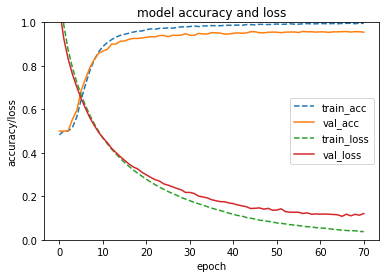

In [10]:
plt.plot(history.history['acc'], '--')
plt.plot(history.history['val_acc'])
plt.plot(history.history['loss'], '--')
plt.plot(history.history['val_loss'])
plt.title('model accuracy and loss')
plt.ylabel('accuracy/loss')
plt.xlabel('epoch')
plt.ylim([0, 1])
plt.legend(['train_acc', 'val_acc', 'train_loss', 'val_loss'], loc='right')
plt.show()

In [11]:
model.load_weights('best_weights.h5')
model.layers[-1].get_weights()[0]

array([[-8.43735027,  0.6902377 ,  9.60691071]], dtype=float32)